<a id="1"></a><h2></h2>
<div style="background-color:rgba(0, 153, 0, 0.5);border-radius: 15px 50px;display:fill">
    <h1><center>1. Introduction</center></h1>
</div>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#DAA520;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:black;"><b>1.1 | Goal</b></p>
</div>

In this challenge, we are given a dataset where each row belongs to a particular cluster. Our job is to predict the cluster each row belongs to. <br>

<div class="alert alert-block alert-info"> 
    In this competation we need to tackle two problems   <br>
        Problem-1) We need to identify number of optimum clusters <br>
        Problem-2) Assign each row to the corresponding cluster. <br>
    
</div>


<br>
<img src= "https://qjjnh3a9hpo1nukrg1fwoh71-wpengine.netdna-ssl.com/wp-content/uploads/2021/08/1_OYPYjXS8v855BKLV0r9kTAedited.gif" alt ="TPA MAY" style='width: 800px;'>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#DAA520;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:black;"><b>1.2 | Load data and preprocessing</b></p>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering
from matplotlib import cm
import seaborn as sns
import missingno as no

In [2]:
data= pd.read_csv("../input/tabular-playground-series-jul-2022/data.csv")
pd.set_option('display.max_columns', None)
data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,5,13,6,6,-0.469819,0.358126,1.068105,-0.559650,-0.366905,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,4,6,16,9,0.591035,-0.396915,0.145834,-0.030798,0.471167,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,8,9,3,11,-0.679875,0.469326,0.349843,-0.288042,0.291470,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,8,9,6,4,-0.389456,0.626762,-1.074543,-1.521753,-1.150806,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,3,1,13,11,-0.120743,-0.615578,-1.064359,0.444142,0.428327,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [3]:
data.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,8.193163,8.057878,8.084990,7.076388,6.286102,0.003413,-0.002639,0.005404,0.001656,-0.005399,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,5.904919,4.700226,4.197106,4.433308,4.120077,0.998940,1.001096,1.003277,1.001258,0.995965,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.377021,-4.535903,-4.182233,-4.468930,-4.149688,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,4.000000,5.000000,5.000000,4.000000,3.000000,-0.671810,-0.677757,-0.671055,-0.672635,-0.680243,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,7.000000,7.000000,8.000000,6.000000,6.000000,0.003536,-0.004299,0.006535,0.001663,-0.001574,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,11.000000,11.000000,11.000000,10.000000,9.000000,0.678679,0.673859,0.680903,0.673174,0.666996,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,44.000000,36.000000,28.000000,38.000000,30.000000,4.490521,4.270708,4.157538,4.230849,4.710316,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [4]:
data.drop('id', axis=1).describe().T.style.bar(subset=['mean'], color=px.colors.qualitative.Pastel[4])\
                                        .background_gradient(subset=['std'], cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
f_00,98000.000000,0.001220,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521
f_01,98000.000000,0.005580,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974
f_02,98000.000000,-0.001042,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247
f_03,98000.000000,-0.000700,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373
f_04,98000.000000,-0.003522,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549
f_05,98000.000000,-0.001612,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316
f_06,98000.000000,-0.003042,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595
f_07,98000.000000,5.545918,3.691840,0.000000,3.000000,5.000000,8.000000,32.000000
f_08,98000.000000,6.763061,4.152348,0.000000,4.000000,6.000000,9.000000,30.000000
f_09,98000.000000,8.193163,5.904919,0.000000,4.000000,7.000000,11.000000,44.000000


In [5]:
# any missing values
print("Data Shape: There are {:,.0f} rows and {:,.0f} columns.\nMissing values = {}, Duplicates = {}.\n".
      format(data.shape[0], data.shape[1],data.isna().sum().sum(), data.duplicated().sum()))

Data Shape: There are 98,000 rows and 30 columns.
Missing values = 0, Duplicates = 0.



### Quick insights:
1) Total 28 colums in this dataset <br>
2) Columns F7-F13 seems to have large values when compared to others. May be these columns are categorical data.<br>
3) we need to apply scaling before clustering.<br>

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


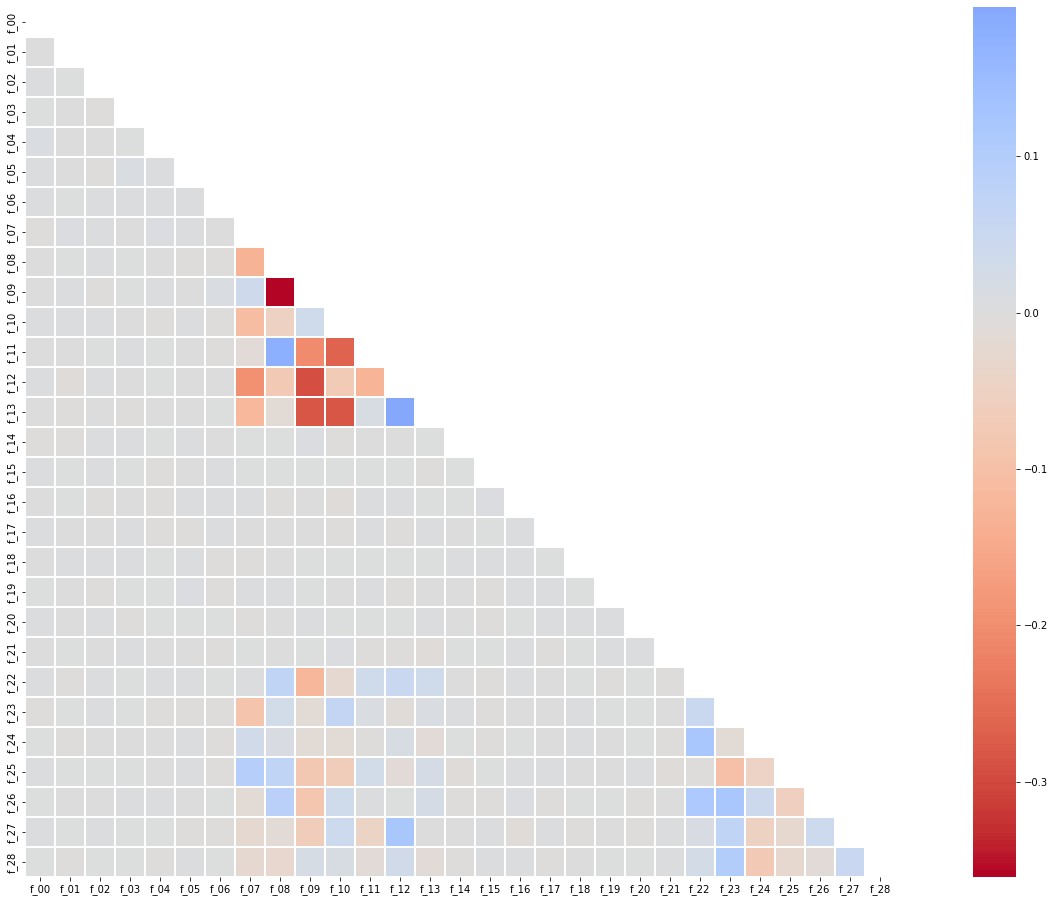

In [6]:
fig, ax = plt.subplots(figsize=(28,16))
corr_mat = data.drop(["id"], axis=1).corr()
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat, mask=mask, square=True, ax=ax, linewidths=0.1,center=0, cmap='coolwarm_r');

Quick insight:
1) F9 is highly correlated with F8. <br>

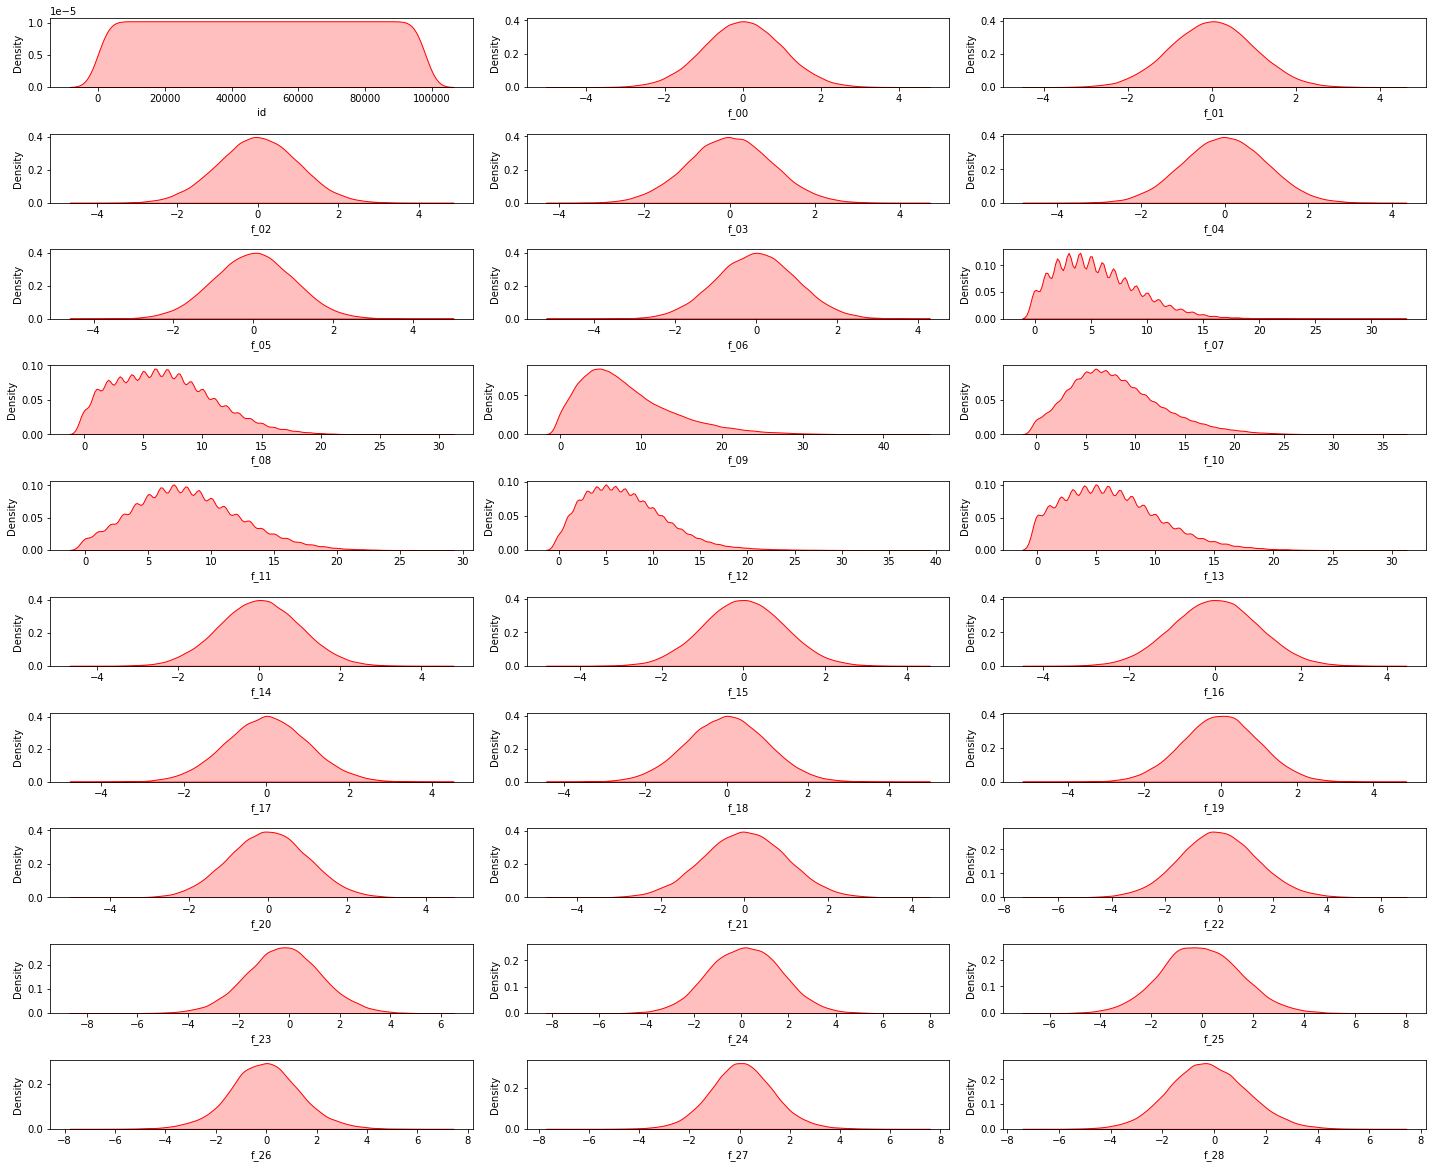

In [7]:
fig = plt.figure(figsize=(20,40))

for i, col in enumerate(data.columns):
    plt.subplot(25,3, i+1)
    sns.kdeplot(data[col], fill=True, color='red')
    
plt.tight_layout()



In [8]:
# lets divide the dataset into two subsets
subset1=data.drop(['f_07','f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13'], axis = 1)
subset2 = data[['f_07','f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13']].copy()

In [9]:
# Lets take a closer look at the subset1
subset1.drop('id', axis=1).describe().T.style.bar(subset=['mean'], color=px.colors.qualitative.Pastel[4])\
                                        .background_gradient(subset=['std'], cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
f_00,98000.000000,0.001220,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521
f_01,98000.000000,0.005580,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974
f_02,98000.000000,-0.001042,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247
f_03,98000.000000,-0.000700,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373
f_04,98000.000000,-0.003522,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549
f_05,98000.000000,-0.001612,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316
f_06,98000.000000,-0.003042,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595
f_14,98000.000000,0.003413,0.998940,-4.377021,-0.671810,0.003536,0.678679,4.490521
f_15,98000.000000,-0.002639,1.001096,-4.535903,-0.677757,-0.004299,0.673859,4.270708
f_16,98000.000000,0.005404,1.003277,-4.182233,-0.671055,0.006535,0.680903,4.157538


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


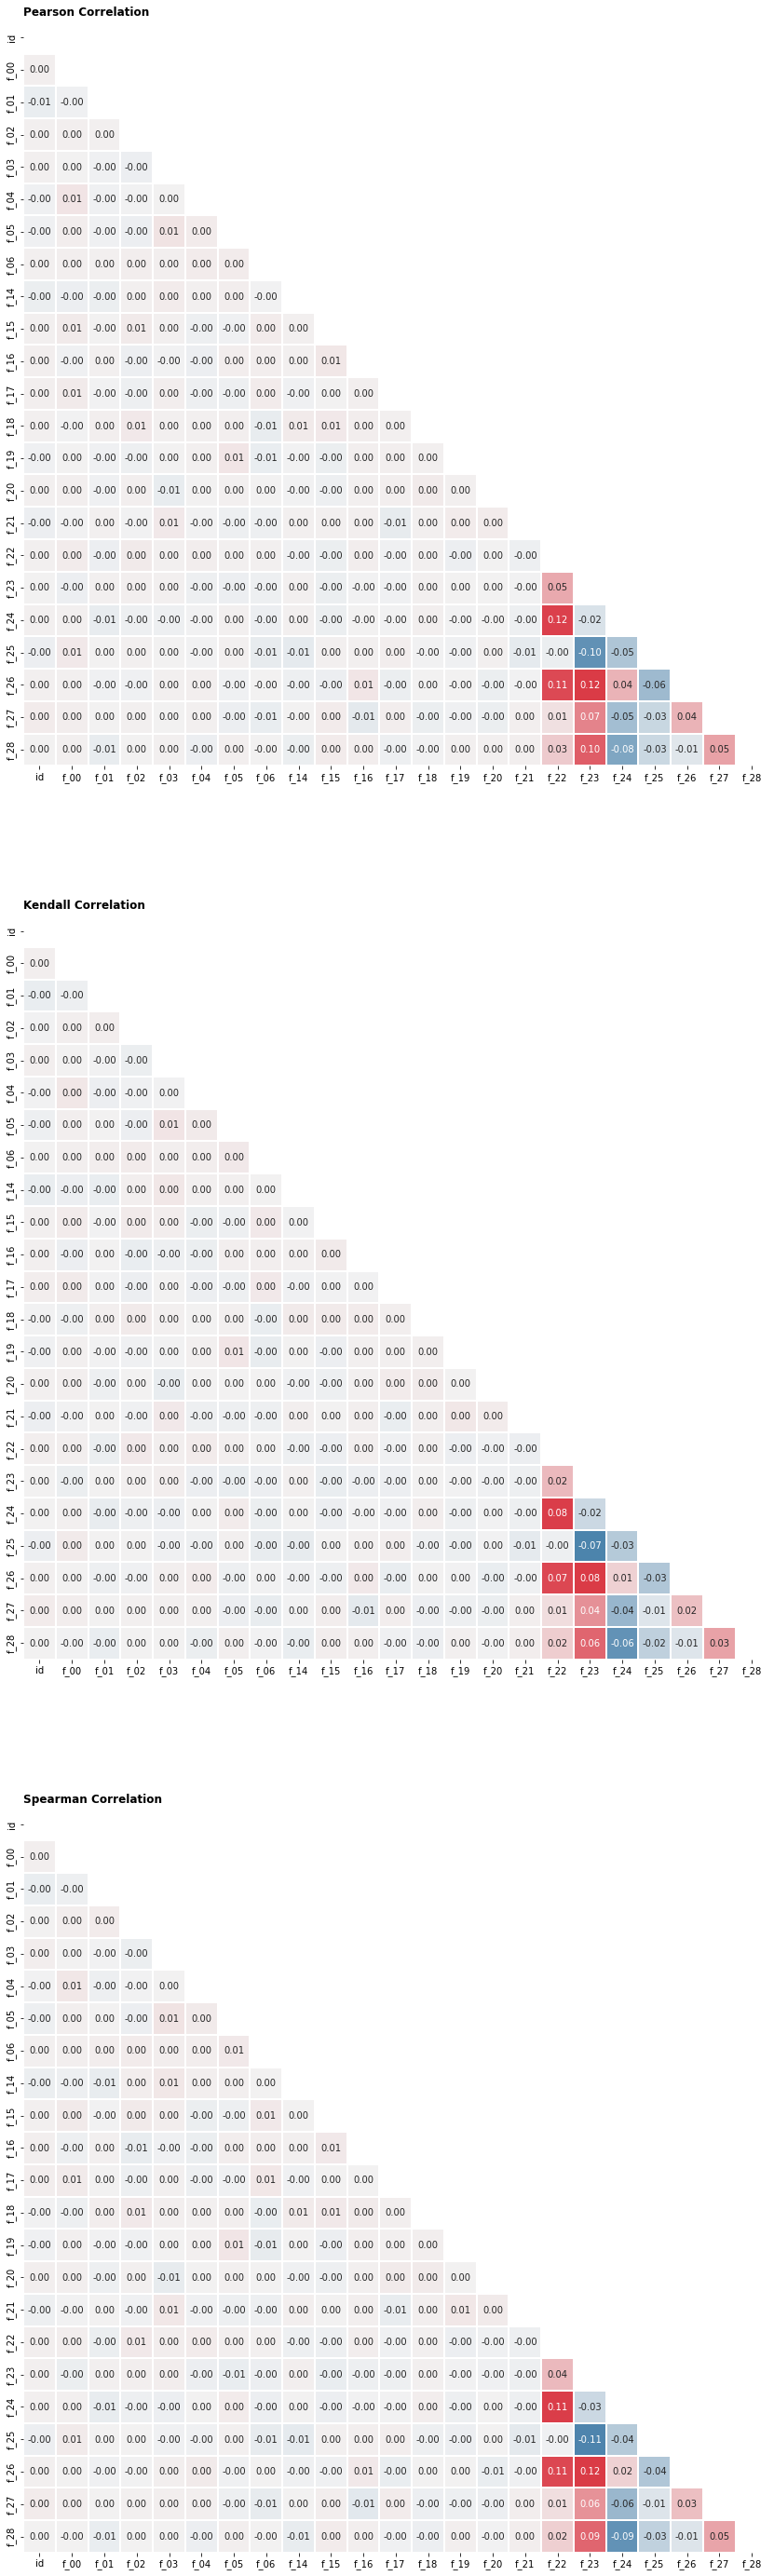

In [11]:
#plotting correlation for subset1
fig, ax = plt.subplots(3, 1, figsize=(150 , 50))
corr = subset1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
for idx, method in enumerate(['pearson', 'kendall', 'spearman']):
    sns.heatmap(subset1.corr(method=method), ax=ax[idx],
            square=True, annot=True, fmt='.2f', center=0, linewidth=2,
            cbar=False, cmap=sns.diverging_palette(240, 10, as_cmap=True),
            mask=mask
           ) 
    ax[idx].set_title(f'{method.capitalize()} Correlation', loc='left', fontweight='bold')     
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


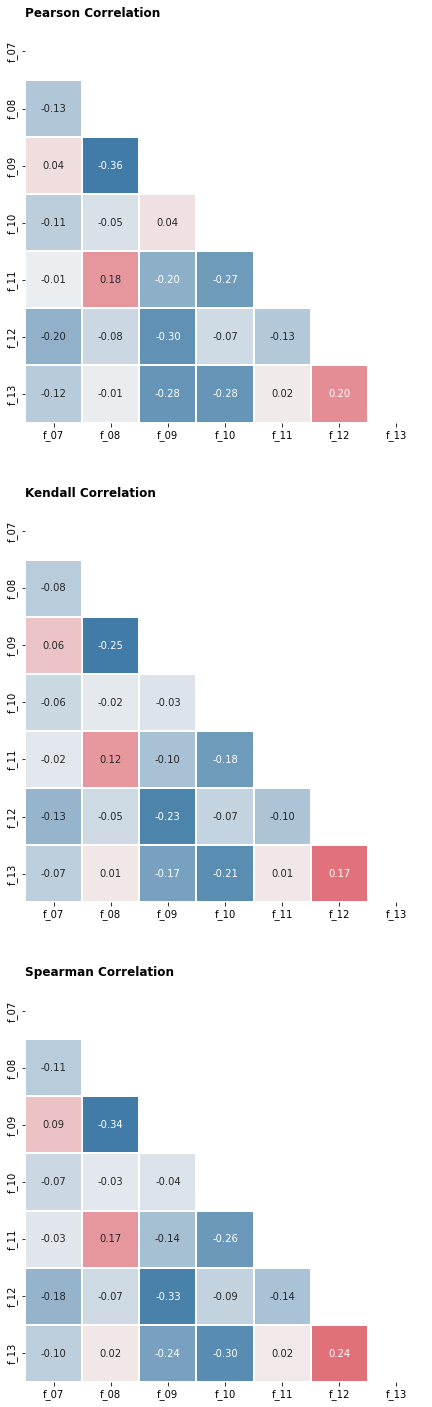

In [12]:
#plotting correlation for subset2
fig, ax = plt.subplots(3, 1, figsize=(50 , 25))
corr = subset2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
for idx, method in enumerate(['pearson', 'kendall', 'spearman']):
    sns.heatmap(subset2.corr(method=method), ax=ax[idx],
            square=True, annot=True, fmt='.2f', center=0, linewidth=2,
            cbar=False, cmap=sns.diverging_palette(240, 10, as_cmap=True),
            mask=mask
           ) 
    ax[idx].set_title(f'{method.capitalize()} Correlation', loc='left', fontweight='bold')     
plt.show()

In [13]:
# scaling all the columns except ID
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns="id"))
data_scaled_df=pd.DataFrame(data_scaled, index=data.index, columns=data.drop(columns="id").columns)
data_scaled_df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389551,-0.917695,0.649105,0.589499,-0.824775,0.734849,2.267432,-0.960479,1.502035,0.983395,-0.650584,1.171053,-0.242797,-0.069441,-0.473738,0.360372,1.059236,-0.560604,-0.362972,-0.471839,-0.754257,-0.762195,-0.711585,0.911572,-0.680948,0.762783,0.960482,1.045296,0.683323
1,-0.688544,-0.459195,0.654321,0.995533,-1.644472,0.864967,-0.087835,-0.960479,-0.906254,-0.371415,-0.863341,-0.496771,2.012866,0.658704,0.588248,-0.393846,0.139972,-0.032414,0.478499,-0.422434,-0.089129,-1.783073,-0.541815,0.454693,1.032386,-0.133948,-0.552942,0.355435,-1.602671
2,0.805607,0.318753,-1.167963,-0.623531,0.108638,0.785146,1.996476,-0.147872,1.020377,-0.540766,-0.012314,0.218011,-0.919496,1.144134,-0.684017,0.471450,0.343316,-0.289336,0.298074,-0.407243,-1.597140,1.193015,2.236943,0.088090,-1.513324,-0.577814,0.979171,-0.926250,-2.224327
3,-0.500743,0.223305,0.264788,0.232124,0.417259,-1.219016,0.142257,0.122997,-1.147082,0.814044,-0.012314,0.218011,-0.242797,-0.554872,-0.393288,0.628715,-1.076425,-1.521504,-1.150052,0.621083,1.284518,0.534669,0.727667,-1.218753,0.825698,-1.164842,-0.397908,-0.114228,0.307002
4,-0.670613,-1.044343,-0.268745,-1.828801,-0.285713,-1.850223,0.786963,0.664735,0.057062,-0.540766,-1.076098,-1.688074,1.336167,1.144134,-0.124288,-0.612271,-1.066274,0.441932,0.435485,-1.617255,-0.433152,0.324273,0.218614,-1.484025,0.847369,-0.622034,1.166086,-0.385886,-1.149094


<div style="color:white;display:fill;border-radius:8px;
            background-color:#DAA520;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:black;"><b>2.0| Identifying the optimal number of clusters</b></p>
</div>

# Elbow method
As name suggests, elbow method uses structure of arm to identify optimal number of clusters. As shown in the below figure  The elbow point is found when the dataset becomes flat or linear after applying the cluster analysis algorithm. Its worth to that, depending on the value of parameter ‘metric’ the structure of the elbow method may change. Typically, clustering algorithm is applied on the dataset for a given number of clusters to find groups in data in unlabeled data. After that, an average score has been calculated according to the parameter ‘metric’. The default value for the metric parameter is ‘distortion’ which calculates the sum of squared distances from the assigned centroids

<img src= "https://miro.medium.com/max/838/1*RnvrdhlUxHWss3vOffHT5g.png" alt ="TPA MAY" style='width: 800px;'>

[source](https://miro.medium.com/max/838/1*RnvrdhlUxHWss3vOffHT5g.png)

### now we have good understanding of this approach, lets apply to our case

In [ ]:
# lets choose sample of data
# data_sampled= data_scaled_df.sample(frac =0.2)  # I am using only 20% of data, data_sampled= data_scaled_df.copy() if you want to use full data
# data_sampled.head()

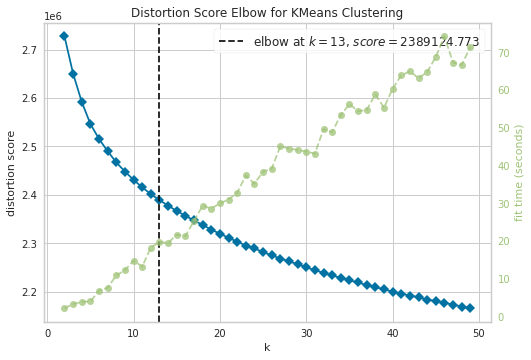

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
#https://notebook.community/DistrictDataLabs/yellowbrick/examples/clustering_visualizers
from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer
Plot_elbow = KElbowVisualizer(KMeans(random_state=100), k=(2,50))
Plot_elbow.fit(data_scaled_df.values)
Plot_elbow.show()

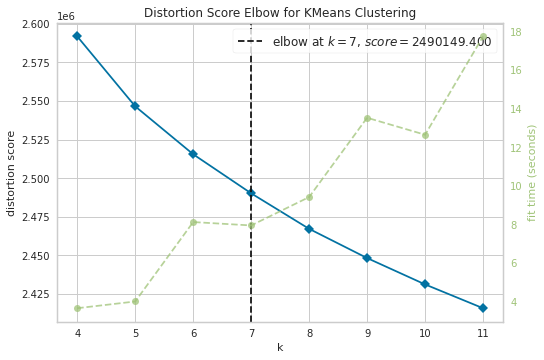

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
#https://notebook.community/DistrictDataLabs/yellowbrick/examples/clustering_visualizers
from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer
Plot_elbow = KElbowVisualizer(KMeans(random_state=23), k=(4,12))
Plot_elbow.fit(data_scaled_df.values)
Plot_elbow.show()

### As we can see above two plots, based on the K range, the optimum K value changes from 7 to 13. Elbow method might not be useful to identify optimum cluster size. Need further investigation. Lets try another way.

# Silhouette Score Method
The silhouette score of a point measures how close that point lies to its nearest neighbor points, across all clusters. It provides information about clustering quality which can be used to determine whether further refinement by clustering should be performed on the current clustering. Lets take a look at the same data with two different type of clustering. <br>
The silhouette coefficient can take values in the interval [-1, 1]. <br>

If it is 0 –> the sample is very close to the neighboring clusters. <br>
It it is 1 –> the sample is far away from the neighboring clusters. <br>
It it is -1 –> the sample is assigned to the wrong clusters. <br>


<img src= "https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_002.png" alt ="TPA JULY" style='width: 800px;'>
<img src= "https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_005.png" alt ="TPA JULY" style='width: 800px;'>

[source](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)


### let's apply it to our case

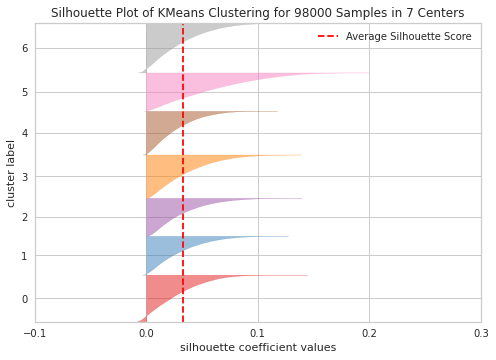

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 98000 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [16]:
# Instantiate the clustering model and visualizer 
model = KMeans(7)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(data_scaled_df.values)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

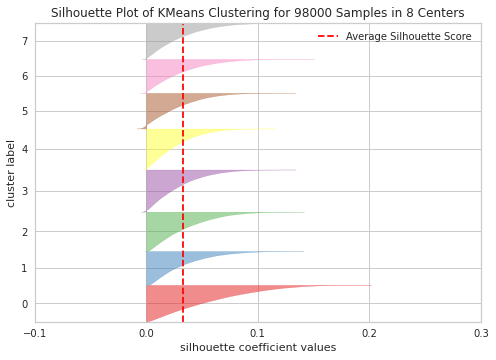

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 98000 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
# Instantiate the clustering model and visualizer 
model = KMeans(8)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(data_scaled_df.values)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

### As we can see above there are some negative silehoutte coefficient values for both 7 and 8, which indicate they might not be perfect optimal cluster number. Graphical representation of the aforementioned approaches can be seen in this [video](https://www.youtube.com/watch?v=AtxQ0rvdQIA). Intercluster distance maps for various scenarios can be found below. It has been noticed these plots vary randomly (if you run the same cell twice, the results vary) which makes it difficult to interpret them. Further investigation is needed<br>

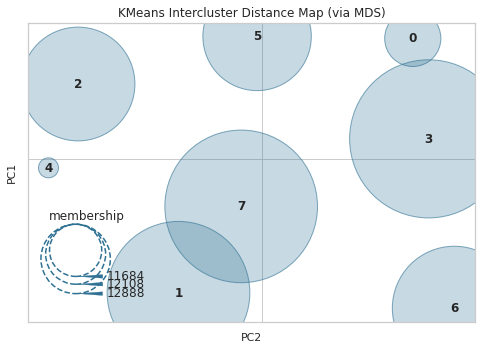

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [34]:
# Instantiate the clustering model and visualizer
model = KMeans(8)
visualizer = InterclusterDistance(model)
visualizer.fit(data_scaled_df.values)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

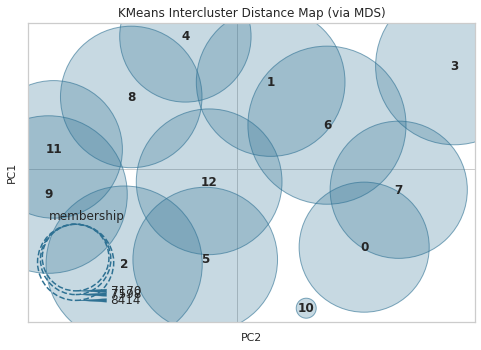

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [19]:
# Instantiate the clustering model and visualizer
model = KMeans(13)
visualizer = InterclusterDistance(model)
visualizer.fit(data_scaled_df.values)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

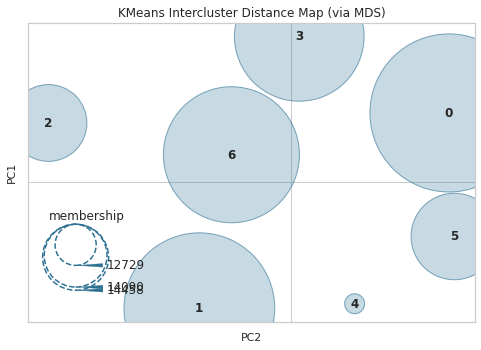

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [28]:
# Instantiate the clustering model and visualizer
model = KMeans(7)
visualizer = InterclusterDistance(model)
visualizer.fit(data_scaled_df.values)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

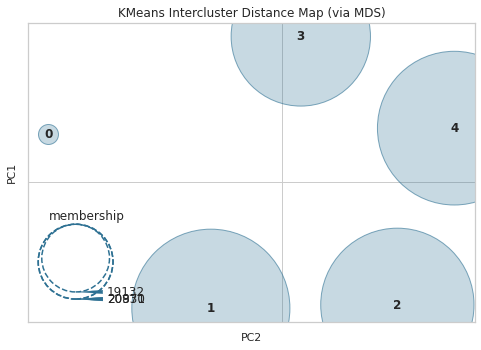

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [32]:
# Instantiate the clustering model and visualizer
model = KMeans(5)
visualizer = InterclusterDistance(model)
visualizer.fit(data_scaled_df.values)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

<div style="color:white;display:fill;border-radius:8px;
            background-color:#DAA520;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:black;"><b>2.2| dimension reduction</b></p>
</div>

### Currently we have 29 columns in our dataset. It might be useful if we can reduce the dimentionality of the problem which can help for better clustering.

### Autoencoder approach: 
AutoEncoder is an unsupervised Artificial Neural Network that attempts to encode the data by compressing it into the lower dimensions (bottleneck layer or code) and then decoding the data to reconstruct the original input. The bottleneck layer (or code) holds the compressed representation of the input data. <br>
<img src= "https://i0.wp.com/neptune.ai/wp-content/uploads/Autoencoders-graph.png?resize=768%2C576&ssl=1" alt ="TPA JULY" style='width: 800px;'>

[source](https://i0.wp.com/neptune.ai/wp-content/uploads/Autoencoders-graph.png?resize=768%2C576&ssl=1)



In [ ]:
import tensorflow as tf
n_components = 15   # here we are choosing 15 means, the number of columns will decrese frm 29 to 15.

tf.random.set_seed(42)
KI = tf.keras.initializers.glorot_uniform(seed=42)

encoder_input = tf.keras.layers.Input(shape=(data_scaled_df.shape[1],), name="Input")
encoder_x = tf.keras.layers.Dense(256, activation="relu", kernel_initializer=KI, name="Encoder")(encoder_input)
encoder_output = tf.keras.layers.Dense(n_components, activation="swish", kernel_initializer=KI, name="Bottleneck")(encoder_x)

decoder_x = tf.keras.layers.Dense(256, activation="relu", kernel_initializer=KI, name="Decoder")(encoder_output)
decoder_output = tf.keras.layers.Dense(data_scaled_df.shape[1], kernel_initializer=KI, name="Output")(decoder_x)

encoder = tf.keras.Model(encoder_input, encoder_output)
autoencoder = tf.keras.Model(encoder_input, decoder_output)

autoencoder.compile(optimizer="adam", loss="mse")
# remove verbose = 0 below if you want to see the loss at every epoch
history = autoencoder.fit(data_scaled_df, data_scaled_df, epochs=20, verbose = 0)  # epochs numbers can be used as tuning parameter, for tutorial purpose I used 20. I can try 200

Prob_df=pd.DataFrame(index=data_scaled_df.index)
enc_x = encoder.predict(data_scaled_df)
enc_cols = []
for i in range(n_components):
    col = i
    Prob_df[col] = enc_x[:,i]
Prob_df.head()

### As we can see above autoencoder is used to reduced the dimensionality. 

### PCA approach: 
Principal Component Analysis (PCA) is anther popular technique for deriving a set of low dimensional features from a larget set of data. Once again, in here we use PCA to convert 29 columns to 15 columns.

In [ ]:
from sklearn.decomposition import PCA
n_comp = 15
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(data_scaled_df)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())
print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])

In [ ]:
# Lets visualize the reduced dimensions (29 to 15)
pca_cols = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_cols, index=data_scaled_df.index)
X_pca_df.head()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#DAA520;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:black;"><b>3.0| Clustering the data</b></p>
</div>

Clustering of the data can be performed using either all the columns or reduced dimentions. In our case we can use output of the PCA or Autoencoder.

##  Kmeans approach
One way to think about the k-means model is that it places a circle (or, in higher dimensions, a hyper-sphere) at the center of each cluster, with a radius defined by the most distant point in the cluster.

<img src= "https://miro.medium.com/max/479/1*Zl8_vxkkqv-ZV3IWZdRCmw.png" alt ="TPA JULY" style='width: 800px;'>

[source](https://miro.medium.com/max/479/1*Zl8_vxkkqv-ZV3IWZdRCmw.png)


In [ ]:
# https://www.kaggle.com/code/debu3kaggle/customer-segmentation-using-clustering-analysis
Kmeans_df = data_scaled_df.copy()
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(X_pca)
Kmeans_df['Cluster'] = clusters
print(Kmeans_df['Cluster'].value_counts())

### Gaussian Mixture approach: <br>
In contrast to K-means, GM approach does account for variance. For example, K-means might not be well suited for the below data as it can not fit into circles. GM is able to handle such data as shown below by forming very oblong clusters.

<img src= "https://miro.medium.com/max/479/1*eTAFs5cTUjb_kt-4RgE3uw.png" alt ="TPA JULY" style='width: 800px;'>

[source](https://miro.medium.com/max/479/1*eTAFs5cTUjb_kt-4RgE3uw.png)

In [ ]:
#  coming soon......

# More coming, Work in progress, dont forget to upvote

<img src= "http://4.bp.blogspot.com/-mdNXPCcPpQ4/UBjNfaRDHMI/AAAAAAAABQM/BNhFS6KaFo0/s1600/Garfield+Computer.gif" alt ="TPA MAY" style='width: 800px;'>

[source](http://4.bp.blogspot.com/-mdNXPCcPpQ4/UBjNfaRDHMI/AAAAAAAABQM/BNhFS6KaFo0/s1600/Garfield+Computer.gif)
